In [1]:
import json
import ast
import re

import pandas as pd
import numpy as np

import pycountry
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
owl = pd.read_parquet('output/output/owl.parquet')
owl = owl[
    [
        'id',
        'timestamp',
        'title',
        'body',
        'SEARCH_KEYWORD',
        'OWL_CLASSIFICATION'
    ]
]

owl['OWL_PER_RELATED'] = owl['OWL_CLASSIFICATION'].apply(lambda x: x['percentage_related'])
owl['OWL_CLASSIFICATION'] = owl['OWL_CLASSIFICATION'].apply(lambda x: x['is_related'])

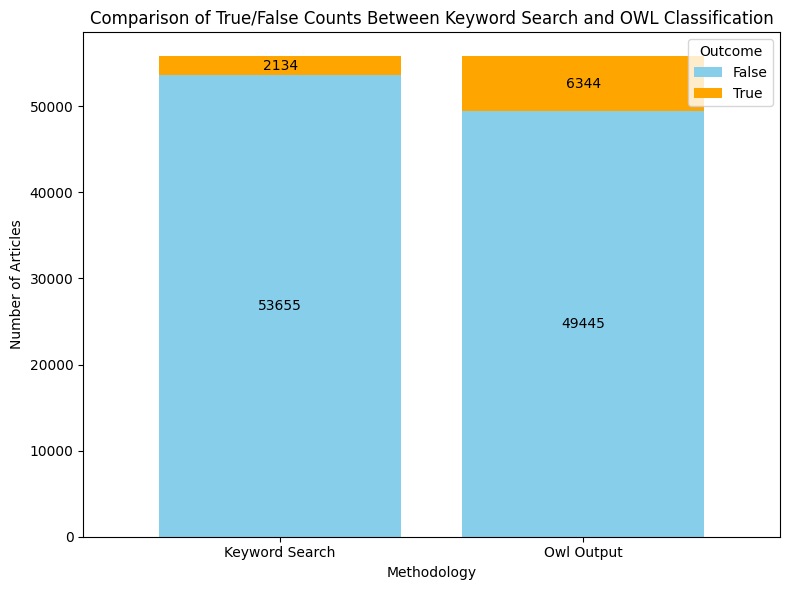

In [3]:
keyword_counts = owl['SEARCH_KEYWORD'].value_counts()
llm_counts = owl['OWL_CLASSIFICATION'].value_counts()

# Create a DataFrame with raw counts
comparison_counts = pd.DataFrame({
    'Keyword Search': keyword_counts,
    'Owl Output': llm_counts
}).T

# Plot a stacked bar chart to compare True/False directly
ax = comparison_counts.plot(kind='bar', stacked=True, figsize=(8, 6), width=0.8, color=['skyblue', 'orange'])

# Add title and labels
plt.title('Comparison of True/False Counts Between Keyword Search and OWL Classification')
plt.xlabel('Methodology')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['False', 'True'])
plt.tight_layout()

# Annotate counts on the bars
for i, bars in enumerate(ax.containers):
    for bar in bars:
        if bar.get_height() > 0:  # Only annotate non-zero heights
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Center text horizontally
                bar.get_height() / 2 + bar.get_y(),  # Center text vertically in the segment
                int(bar.get_height()),  # Value to display
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                fontsize=10,  # Font size
                color='black'  # Text color
            )

# Show the plot
plt.show()


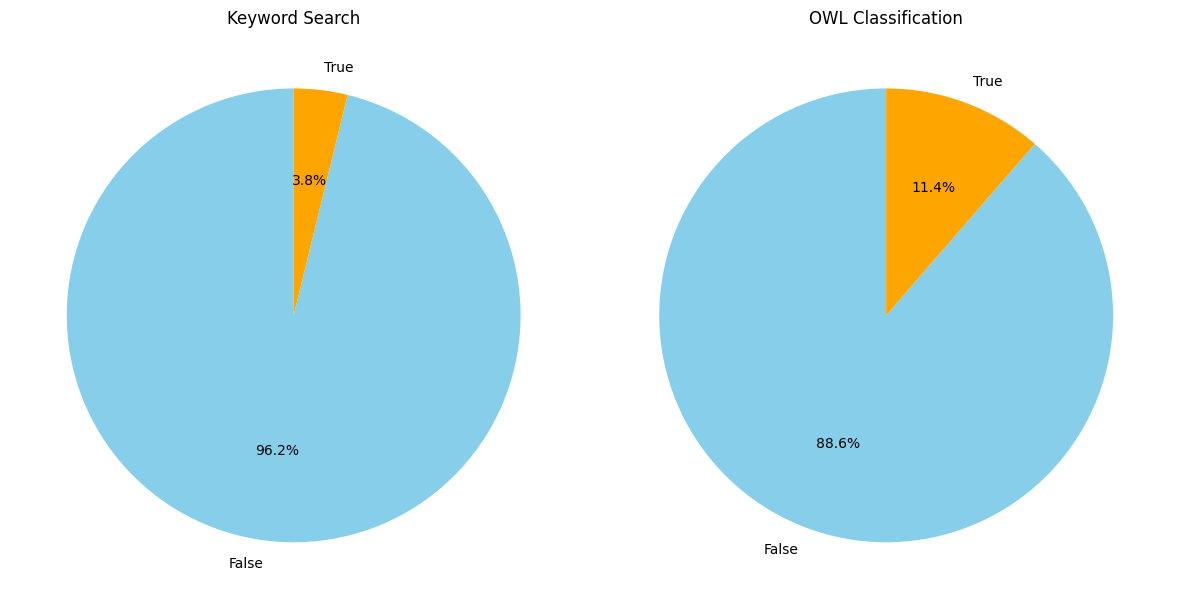

In [4]:
import matplotlib.pyplot as plt

# Calculate proportions for pie charts
keyword_proportions = keyword_counts / keyword_counts.sum()
llm_proportions = llm_counts / llm_counts.sum()

# Create a figure with two subplots for pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Keyword Search
axes[0].pie(
    keyword_proportions,
    labels=['False', 'True'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange']
)
axes[0].set_title('Keyword Search')

# Pie chart for OWL Output
axes[1].pie(
    llm_proportions,
    labels=['False', 'True'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange']
)
axes[1].set_title('OWL Classification')

# Adjust layout
plt.tight_layout()
plt.show()


In [5]:
# After cleaning and preprocessing
owl = pd.read_pickle('checkpoint.pkl')
owl.head()

id            timestamp                                              title  \
0  14  2021-05-14 14:51:25  ‘A special day’: how a Glasgow community halte...   
1  15  2021-05-16 08:30:51  A raid, a march, a court case: how Israel spir...   
2  42  2021-06-21 08:32:25  ‘A woman, a refugee, and a Jew’: pioneering re...   
3  64  2021-07-05 07:00:44  ‘I had designed it a little too small’: Abraha...   
4  86  2021-07-15 10:00:39  A Passage North by Anuk Arudpragasam review – ...   

                                                body  percentage-related  \
0  it was just after 9am on thursday and he was f...                70.0   
1  abd al-fattah iskafi, 71, has lived in his hou...                15.0   
2  on hella pick’s first day as the guardian’s wa...                30.0   
3  last month, in a smart gallery in paris, the b...                10.0   
4  for almost 30 years, the beautiful teardrop-sh...                20.0   

                                             summary  \
0  The article discusses a protest in Glasgow, UK...   
1  The article discusses the ongoing conflict in ...   
2  The article discusses Hella Pick's life and ca...   
3  The article briefly mentions Abraham Poincheva...   
4  The novel 'A Passage North' by Anuk Arudpragas...   

                                          highlights  \
0  [A group of locals, including asylum rights ac...   
1  [The Sheikh Jarrah case involves a dispute ove...   
2  [Hella Pick fled to Britain as a child refugee...   
3  [Abraham Poincheval compared his performance a...   
4  [The novel "A Passage North" is set in post-ci...   

                                           countries  \
0                                   [United Kingdom]   
1                      [Israel, Palestine, State of]   
2  [United Kingdom, Afghanistan, Zimbabwe, Congo,...   
3                                           [France]   
4                                 [Sri Lanka, India]   

                                             regions  \
0                                          [Glasgow]   
1  [Jerusalem, West Bank, Gaza, Jerusalem, West B...   
2                                     [Léopoldville]   
3                                            [Paris]   
4                            [north, colombo, delhi]   

                                              issues  \
0  {'Physical safety threats': 20, 'Deportation r...   
1  {'Discrimination and xenophobia': 20, 'Separat...   
2  {'Trauma from displacement': 50, 'Separated fa...   
3  {'Long-term resettlement issues': 50, 'Unsafe ...   
4  {'Trauma from displacement': 40, 'Cultural and...   

                                     issues-category  
0  {'Security': 20, 'Legal Issues': 40, 'Social I...  
1  {'Security': 20, 'Family Reunification': 15, '...  
2  {'Mental Well-being': 50, 'Family Reunificatio...  
3                        {'Shelter': 80, 'Food': 20}  
4  {'Mental Well-being': 70, 'Family Reunificatio...

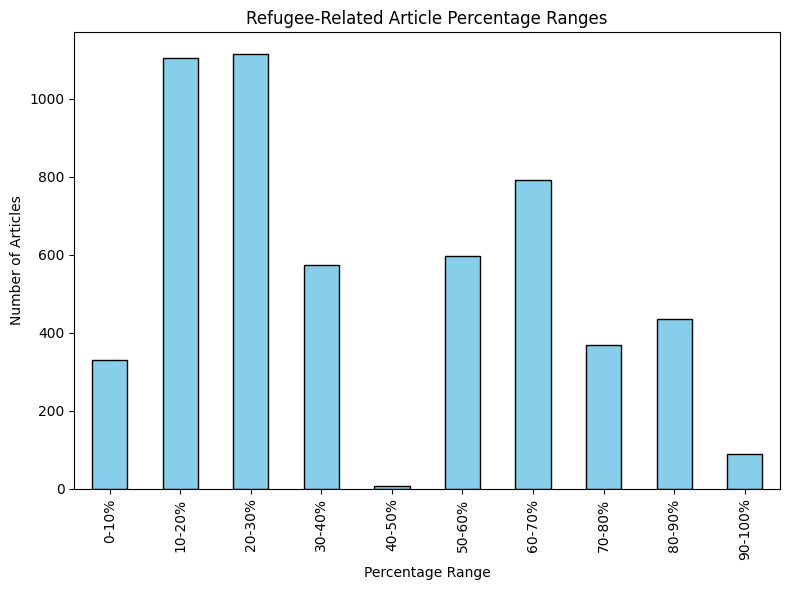

In [6]:
# Bin data into ranges
bins = [
    0, 
    10,
    20,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100
]
labels = [
    '0-10%', 
    '10-20%', 
    '20-30%', 
    '30-40%', 
    '40-50%', 
    '50-60%',
    '60-70%',
    '70-80%',
    '80-90%',
    '90-100%',
]
owl['percentage_range'] = pd.cut(owl['percentage-related'], bins=bins, labels=labels)

# Count the number of articles in each range
range_counts = owl['percentage_range'].value_counts(sort=False)

# Plot bar chart
range_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
plt.title('Refugee-Related Article Percentage Ranges')
plt.xlabel('Percentage Range')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

del owl['percentage_range'] 

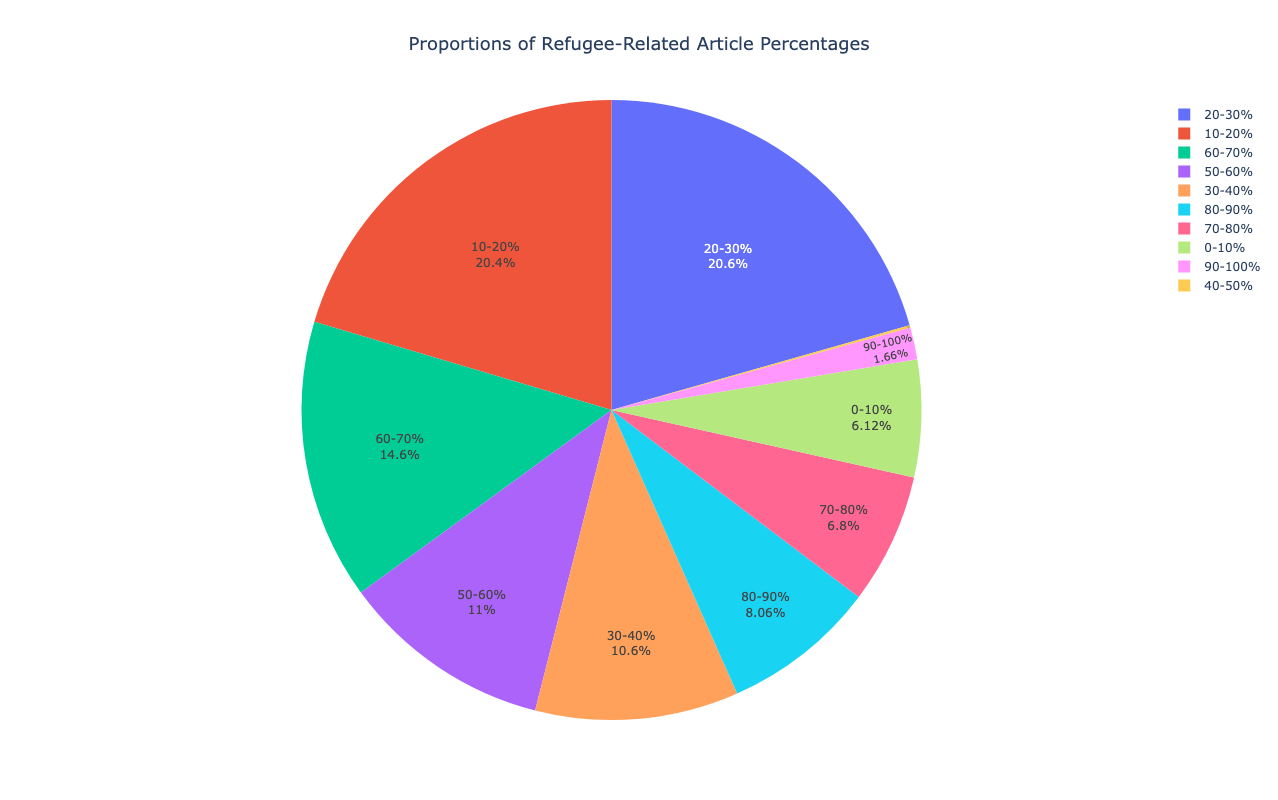

In [7]:
range_proportions = range_counts / range_counts.sum()

pie_data = pd.DataFrame({
    'Range': range_proportions.index,
    'Proportion': range_proportions.values
})

# Create the pie chart
fig = px.pie(
    pie_data,
    names='Range',
    values='Proportion',
    title='Proportions of Refugee-Related Article Percentages'
)

# Update trace to position labels inside the chart when possible
fig.update_traces(
    textposition='inside',  # Labels inside the pie slices
    textinfo='percent+label',  # Show both percentage and label
    # pull=[0.1 if v < 0.02 else 0 for v in pie_data['Proportion']]  # Pull smaller slices
)

# Update layout for better visualization
fig.update_layout(
    title_font_size=18,
    title_x=0.5,  # Center the title
    showlegend=True,  # Display legend for better understanding
    legend=dict(font_size=12),
    width=1000,  # Increase width
    height=800   # Increase height
)

# Display the pie chart
fig.show()


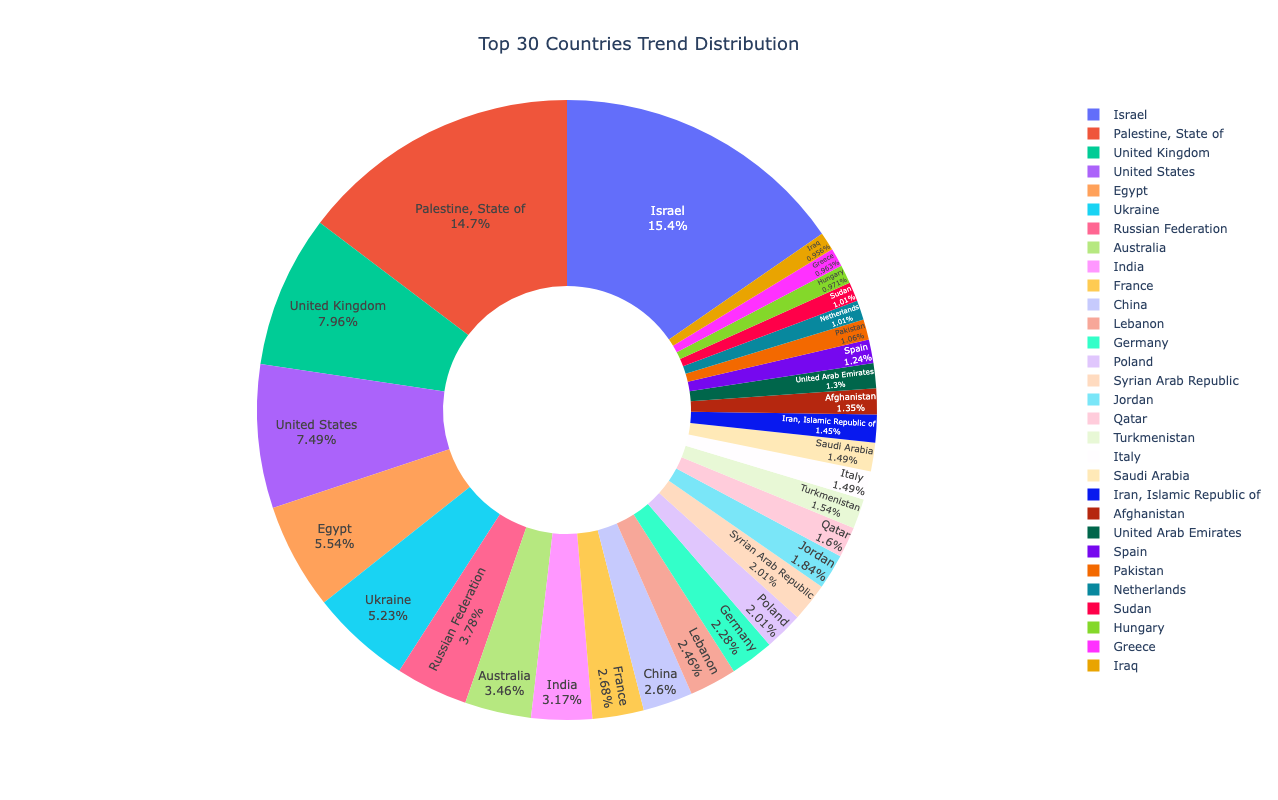

In [8]:
top = 30
extracted_countries = pd.DataFrame(owl['countries'].apply(list).sum(), columns=['countries'])
extracted_countries_count = pd.DataFrame(extracted_countries.value_counts()).reset_index()
extracted_countries_count = extracted_countries_count.sort_values(by='count', ascending=False).iloc[:top]
# extracted_countries_count['countries'] = extracted_countries_count['countries'].where(extracted_countries_count['count'] >= 200, 'Other Countries')
extracted_countries_count = extracted_countries_count.groupby('countries', as_index=False)['count'].sum()
# Plot the pie chart using Plotly
fig = px.pie(extracted_countries_count, names='countries', values='count', title=f'Top {30} Countries Trend Distribution', hole=0.4)
# Update trace to position labels inside the chart when possible
fig.update_traces(
    textposition='inside',  # Labels inside the pie slices
    textinfo='percent+label',  # Show both percentage and label
    #pull=[0.1 if v < 0.02 else 0 for v in pie_data['Proportion']]  # Pull smaller slices
)

# Update layout for better visualization
fig.update_layout(
    title_font_size=18,
    title_x=0.5,  # Center the title
    showlegend=True,  # Display legend for better understanding
    legend=dict(font_size=12),
    width=1000,  # Increase width
    height=800   # Increase height
)

# Display the pie chart
fig.show()

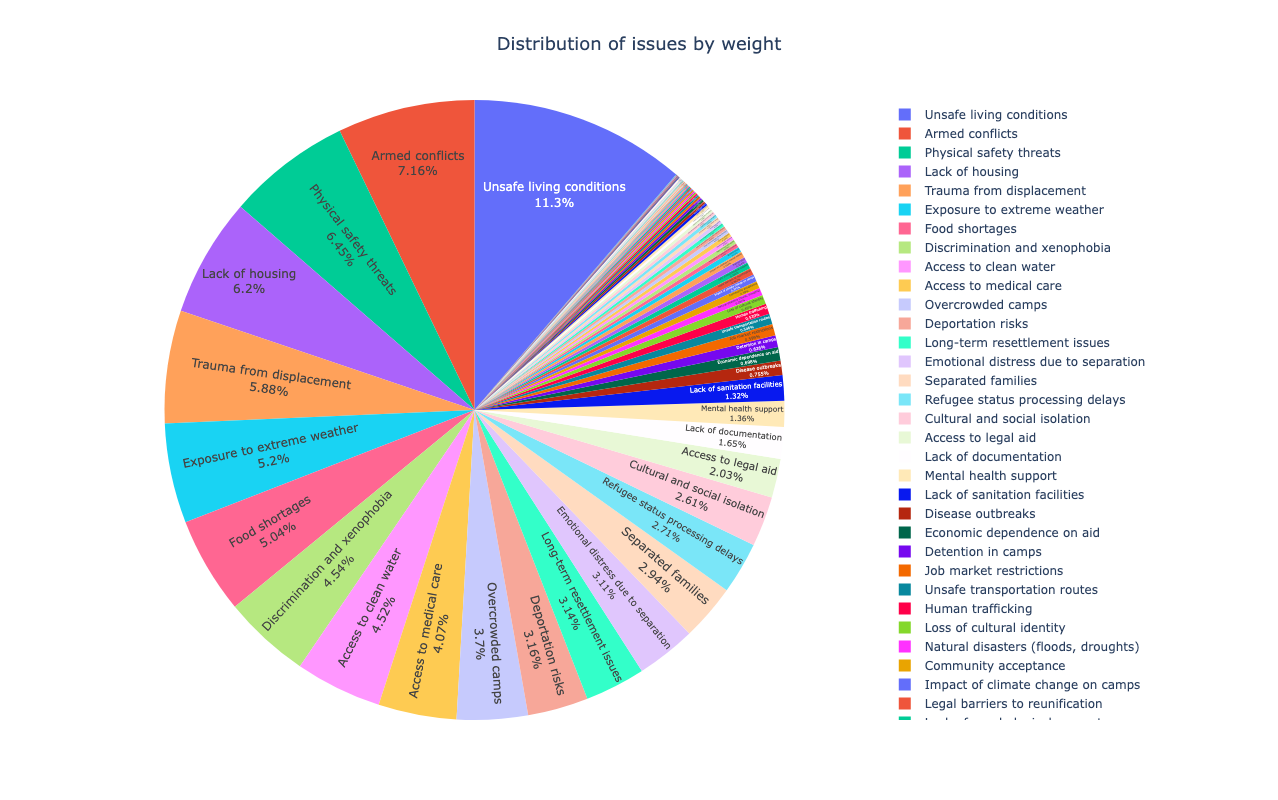

In [9]:
def sum_all_dicts(column):
    total_dict = {}
    for issue_dict in column:
        for key, value in issue_dict.items():
            total_dict[key] = total_dict.get(key, 0) + value
    return total_dict

issues = sum_all_dicts(owl['issues'])
issues = pd.DataFrame(list(issues.items()), columns=['Issue', 'Count'])

# Plot the pie chart using Plotly
fig = px.pie(issues, names='Issue', values='Count', title='Distribution of issues by weight')

# Update trace to position labels inside the chart when possible
fig.update_traces(
    textposition='inside',  # Labels inside the pie slices
    textinfo='percent+label',  # Show both percentage and label
    # pull=[0.1 if v < 0.02 else 0 for v in pie_data['Proportion']]  # Pull smaller slices
)

# Update layout for better visualization
fig.update_layout(
    title_font_size=18,
    title_x=0.5,  # Center the title
    showlegend=True,  # Display legend for better understanding
    legend=dict(font_size=12),
    width=1000,  # Increase width
    height=800   # Increase height
)

# Display the pie chart
fig.show()

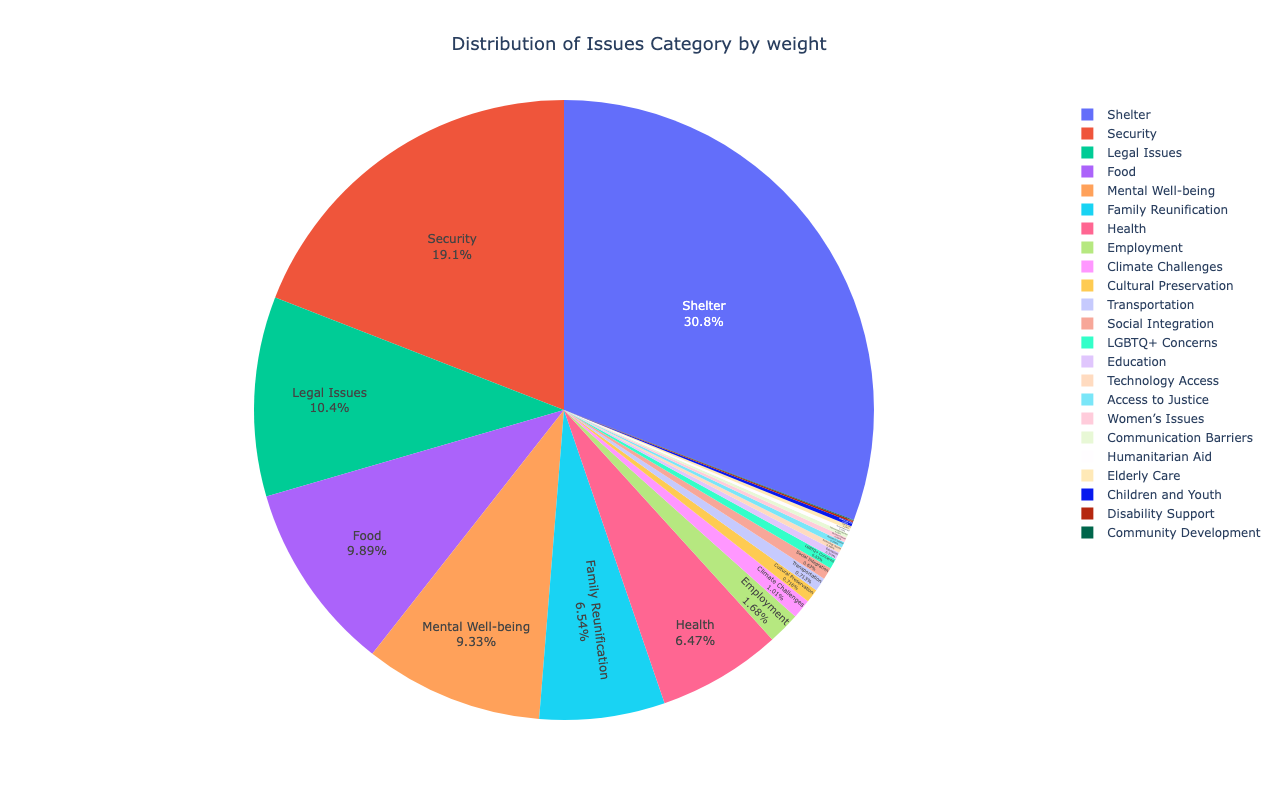

In [10]:
cat_issues = sum_all_dicts(owl['issues-category'])
cat_issues = pd.DataFrame(list(cat_issues.items()), columns=['issue', 'weight'])

# Plot the pie chart using Plotly
fig = px.pie(cat_issues, names='issue', values='weight', title='Distribution of Issues Category by weight')

# Update trace to position labels inside the chart when possible
fig.update_traces(
    textposition='inside',  # Labels inside the pie slices
    textinfo='percent+label',  # Show both percentage and label
    # pull=[0.1 if v < 0.02 else 0 for v in pie_data['Proportion']]  # Pull smaller slices
)

# Update layout for better visualization
fig.update_layout(
    title_font_size=18,
    title_x=0.5,  # Center the title
    showlegend=True,  # Display legend for better understanding
    legend=dict(font_size=12),
    width=1000,  # Increase width
    height=800   # Increase height
)

# Display the pie chart
fig.show()


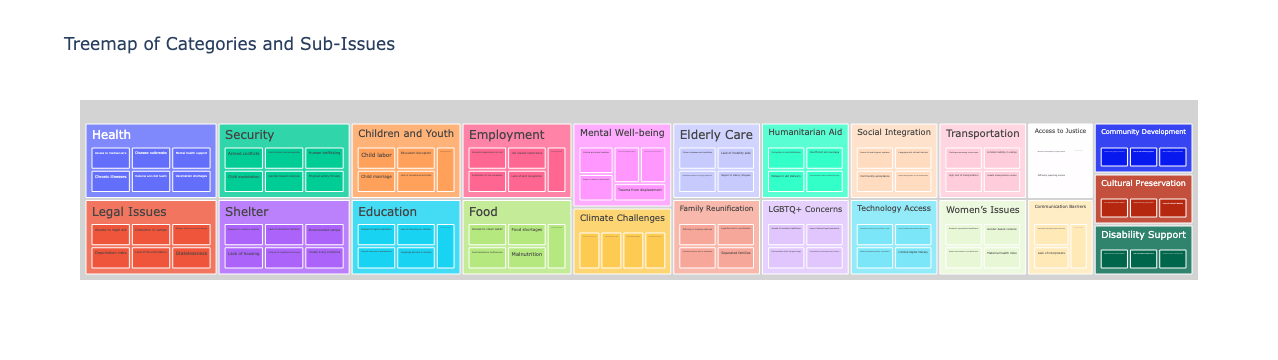

In [11]:
mapper = pd.read_json('resource/refugee_problems_classification.json')
mapper = pd.json_normalize(mapper['classifications'])
mapper = mapper.set_index('category')['issues'].to_dict()

flattened_mapper = []
for category, sub_issues in mapper.items():
    for sub_issue in sub_issues:
        flattened_mapper.append({'Category': category, 'Sub-Issue': sub_issue})

# Convert to a DataFrame
mapper_df = pd.DataFrame(flattened_mapper)

# Plot a treemap
fig = px.treemap(mapper_df, path=['Category', 'Sub-Issue'], title='Treemap of Categories and Sub-Issues')
fig.update_traces(root_color="lightgrey")
fig.show()

In [12]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from collections import Counter

import itertools
import networkx as nx
import plotly.graph_objects as go

# Assume `owl` DataFrame is already loaded and prepared
app = dash.Dash(__name__)

# Prepare country options for the dropdown
country_options = [{'label': country, 'value': country} for country in owl['countries'].explode().dropna().unique()]

# Layout of the app
app.layout = html.Div([
    html.H1("Refugee Issues Visualization by Country"),
    html.Label("Select a Country:"),
    dcc.Dropdown(
        id='country-dropdown',
        options=country_options,
        value='United Kingdom',  # Default value
        placeholder="Select a country"
    ),
    dcc.Graph(id='issues-pie-chart'),
    dcc.Graph(id='nx-graph'),
])

def prepare_country_pairs(row):
    country_pairs = list(itertools.combinations(row['countries'], 2))
    return [(pair, row['issues-category']) for pair in country_pairs]

# Callback to update graphs based on the selected country
@app.callback(
    [
        Output('issues-pie-chart', 'figure'),
        Output('nx-graph', 'figure'),
    ],
    [Input('country-dropdown', 'value')]
)
def update_graphs(selected_country):
    
    filtered_data = owl[owl['countries'].apply(lambda x: selected_country in x)]
    
    if filtered_data.empty:
        print(f"No data available for country: {selected_country}")
        return px.pie(title=f"No data available for {selected_country}")
    
    try:
        # Extract and aggregate issues
        issues_series = filtered_data['issues-category']
        total_issues = issues_series.apply(Counter).sum()
        
        if not isinstance(total_issues, dict):
            return px.pie(title=f"No valid issues data for {selected_country}")
        
        # Create DataFrame for pie chart
        pie_data = pd.DataFrame(list(total_issues.items()), columns=['issue', 'weight'])
        
        pie_chart = px.pie(
            pie_data,
            names='issue',
            values='weight',
            title=f"Issues Distribution in {selected_country}"
        )
        
        pie_chart.update_traces(
            textposition='inside',
            textinfo='percent+label'
        )
        
        pie_chart.update_layout(
            title_font_size=18,
            title_x=0.5,
            showlegend=True,
            legend=dict(font_size=12),
            width=1000,
            height=800
        )

        # MAP GRAPH FROM HERE
        filtered_data['country_pairs'] = filtered_data.apply(prepare_country_pairs, axis=1)
        pairs_with_issues = [
            (pair, issues) for pairs in filtered_data['country_pairs'] for pair, issues in pairs
        ]
        pair_issues_df = pd.DataFrame(pairs_with_issues, columns=['CountryPair', 'Issues'])
        
        pair_issues_df['Weight'] = pair_issues_df['Issues'].apply(lambda x: sum(x.values()))
        
        aggregated_pairs = (
            pair_issues_df.groupby('CountryPair')['Weight']
            .sum()
            .reset_index()
        )
        
        aggregated_pairs = aggregated_pairs[
            aggregated_pairs['CountryPair'].apply(lambda x: selected_country in x and None not in x)
        ]
        
        G = nx.Graph()

        for index, row in aggregated_pairs.iterrows():
            other_country = row['CountryPair'][0] if row['CountryPair'][1] == selected_country else row['CountryPair'][1]
            G.add_edge(selected_country, other_country, weight=row['Weight'])
        
        pos = nx.spring_layout(G, seed=42)
        edge_x = []
        edge_y = []
        weights = []
        
        for edge in G.edges(data=True):
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.append((x0, x1, None))  # x-coordinates of the edge
            edge_y.append((y0, y1, None))  # y-coordinates of the edge
            weights.append(edge[2]['weight'])
        
        edge_trace = go.Scatter(
            x=[coord for x_pair in edge_x for coord in x_pair],
            y=[coord for y_pair in edge_y for coord in y_pair],
            line=dict(width=1, color='rgba(50,50,50,0.5)'),
            hoverinfo='text',
            text=weights,
            mode='lines',
        )
        
        node_trace = go.Scatter(
            x=[pos[node][0] for node in G.nodes()],
            y=[pos[node][1] for node in G.nodes()],
            mode='markers+text',
            marker=dict(size=10, color='skyblue'),
            text=list(G.nodes),
            textposition='top center',
        )
        
        fig = go.Figure(data=[edge_trace, node_trace])
        fig.update_layout(
            title=f"Country Relations Based on Issues Around {selected_country}",
            showlegend=False,
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False),
            width=1000,  # Increase width
            height=800   # Increase height
        )
        
        return pie_chart, fig
        
    except Exception as e:
        print(f"Error processing issues-category: {e}")
        return px.pie(title="Error in Pie Chart"), px.pie(title="Error in Pie Chart")


if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/jj/7qcjgzdn4w1fnv3493zv9n_r0000gn/T/ipykernel_20191/4024196238.py:85: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/7qcjgzdn4w1fnv3493zv9n_r0000gn/T/ipykernel_20191/4024196238.py:85: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jj/7qcjgzdn4w1fnv3493zv9n_r0000gn/T/ipykernel_20191/4024196238.py:85: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th